In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys

df = pd.read_csv('all_img_noise.csv')
df.head()

,img_a,img_b,method,dcor,dcov,mic_e,tic_e,pearson,img
0,img_0_bw,img_0_bw,full,0.999004,0.109840,1.000000,13346.418312,1.000000,0
1,img_0_bw,img_0_bw,hist,1.000000,1118.069248,1.000000,41.335464,1.000000,0
2,img_0_bw,img_0_noise_low,full,0.821802,0.095273,0.517951,4332.547017,0.843960,0
3,img_0_bw,img_0_noise_low,hist,0.816368,1037.214305,0.820440,28.457145,0.736194,0
4,img_0_bw,img_0_noise_mid,full,0.429243,0.066107,0.124030,917.853654,0.463045,0


In [4]:
# plot heatmap for each method and each corr

def get_heatmap(i,  df=df):
    df_0 = df[df['img'] ==i]    
    df_0.head()
    img_path = f'./img/{i+1}.png'
    plt.imshow(plt.imread(img_path), cmap='gray')
    plt.show()

    fig, axs = plt.subplots(3, 2, figsize=(20, 20))
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

    methods = ['full', 'hist']

    corrs = ['dcor', 'mic_e', 'pearson']

    # plot img 




    for i in range(3):
        for j in range(2):
                df_corr = df_0[df_0['method'] == methods[j]]
                df_corr = df_corr[['img_a', 'img_b', corrs[i]]]
                df_corr['img_a'] = df_corr['img_a'].apply(lambda x: x.split('_')[-1])
                df_corr['img_b'] = df_corr['img_b'].apply(lambda x: x.split('_')[-1])
                # sort values in bw, low, mid, high order 
                df_corr['img_a'] = pd.Categorical(df_corr['img_a'], categories=['bw', 'low', 'mid', 'high'], ordered=True)
                df_corr['img_b'] = pd.Categorical(df_corr['img_b'], categories=['bw', 'low', 'mid', 'high'], ordered=True)
                df_corr = df_corr.sort_values(['img_a', 'img_b'])

                # heatmao img_a vs img_b
                #replace nan with 0
                df_corr = df_corr.pivot(index='img_a', columns='img_b', values=corrs[i])
                df_corr.fillna(0, inplace=True)
                # mirror values in matrix 
                df_corr = df_corr + df_corr.T - np.diag(df_corr.values.diagonal())
                # heatma between 0 and 1
                sns.heatmap(df_corr, cmap="rocket_r", ax=axs[i][j], vmin=0, vmax=1)
                axs[i][j].set_title(methods[j] + ' ' + corrs[i])
                axs[i][j].set_xlabel('img_a')
                axs[i][j].set_ylabel('img_b')

    plt.savefig('heatmap_1.png')
    plt.show()


# plot heatmap for each method and each corr    

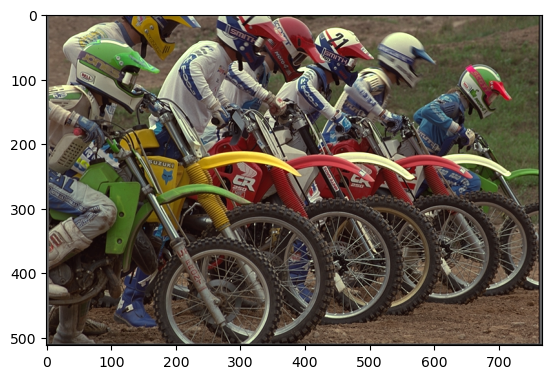

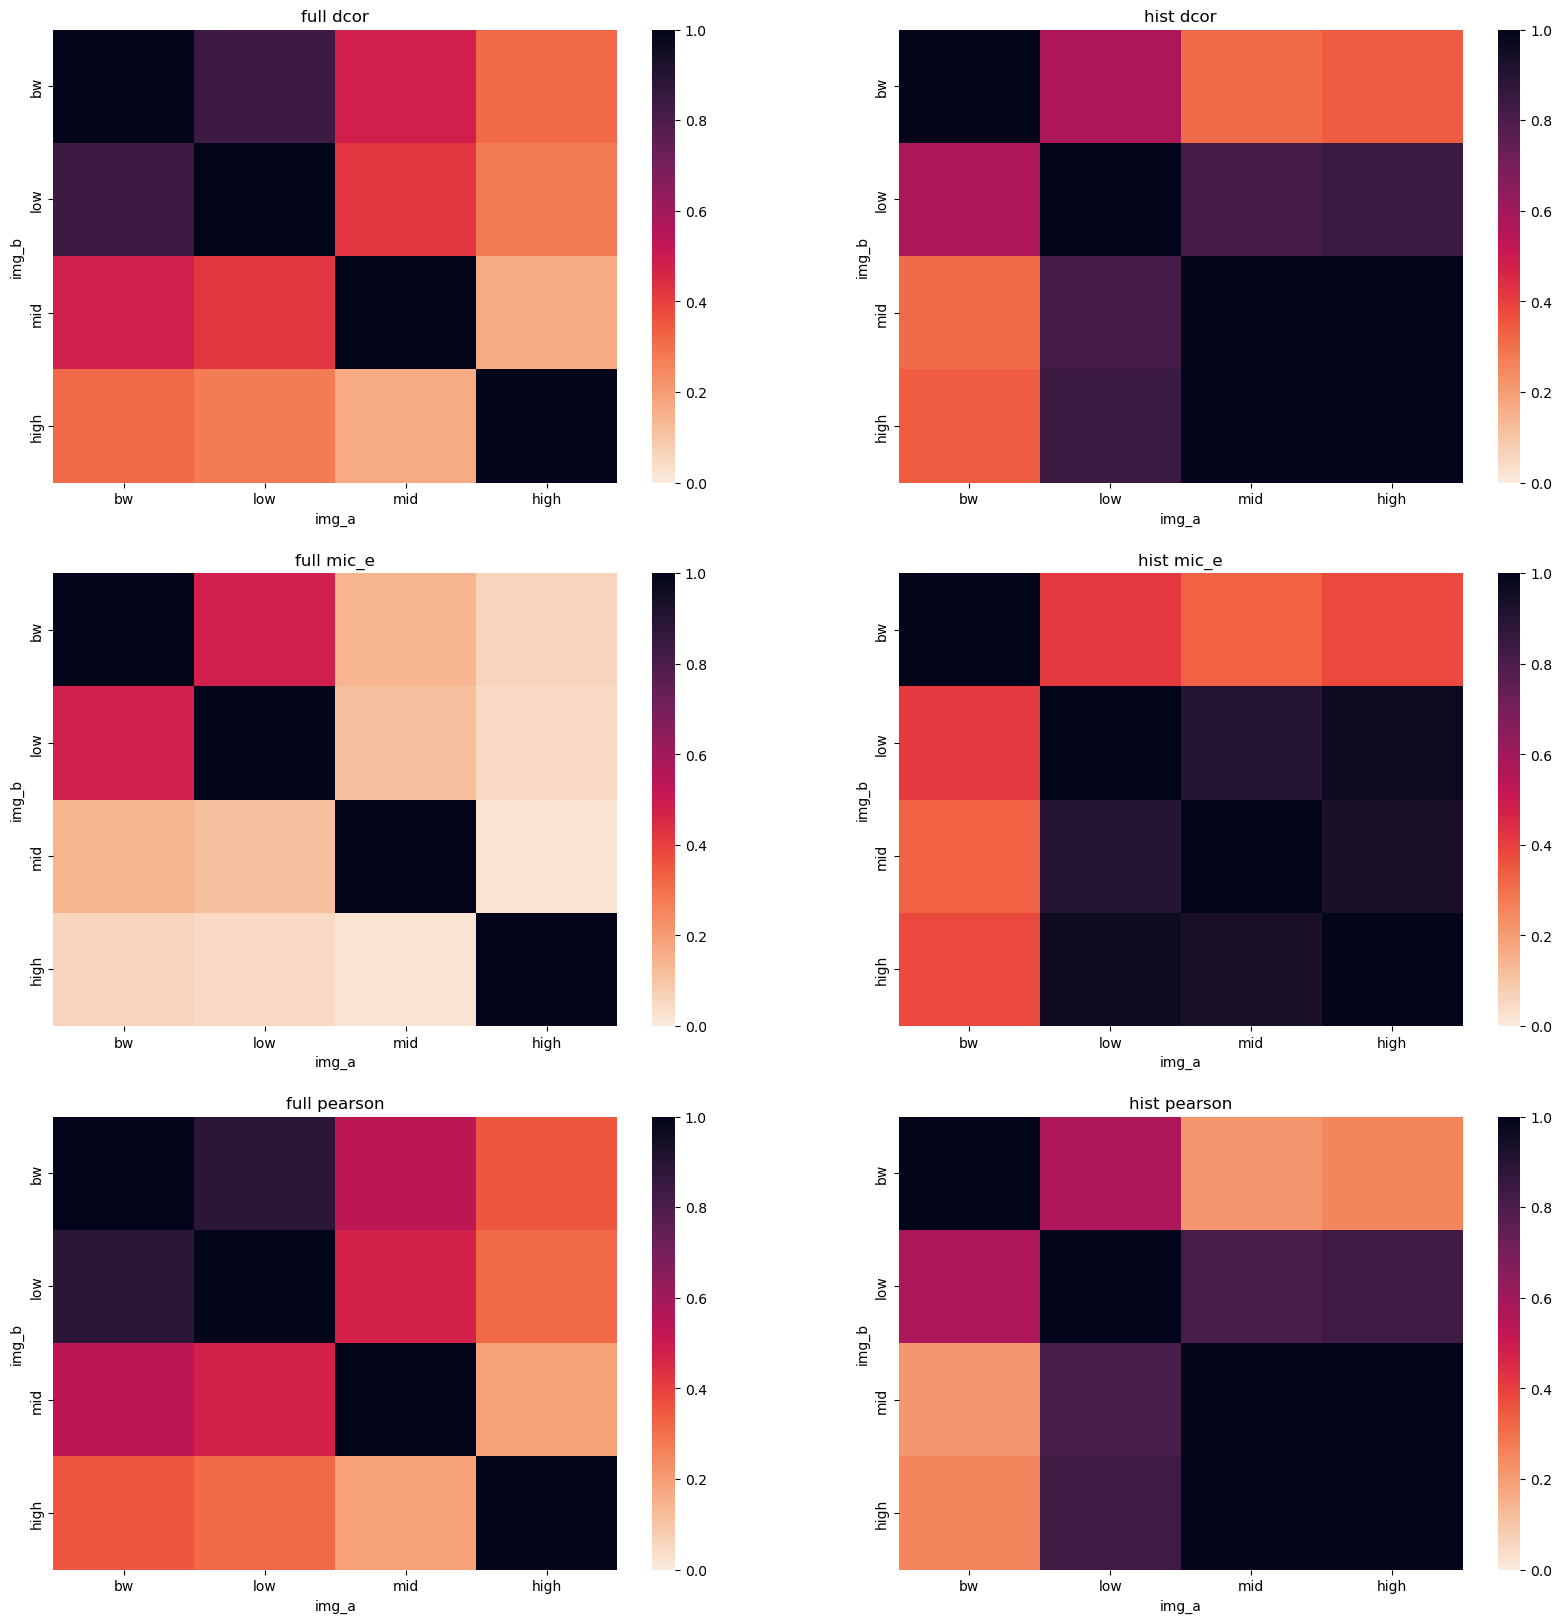

In [6]:
get_heatmap(4)

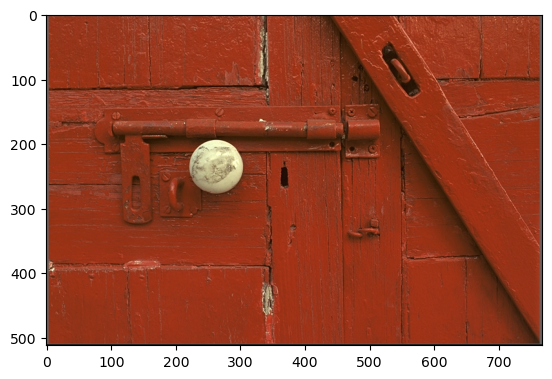

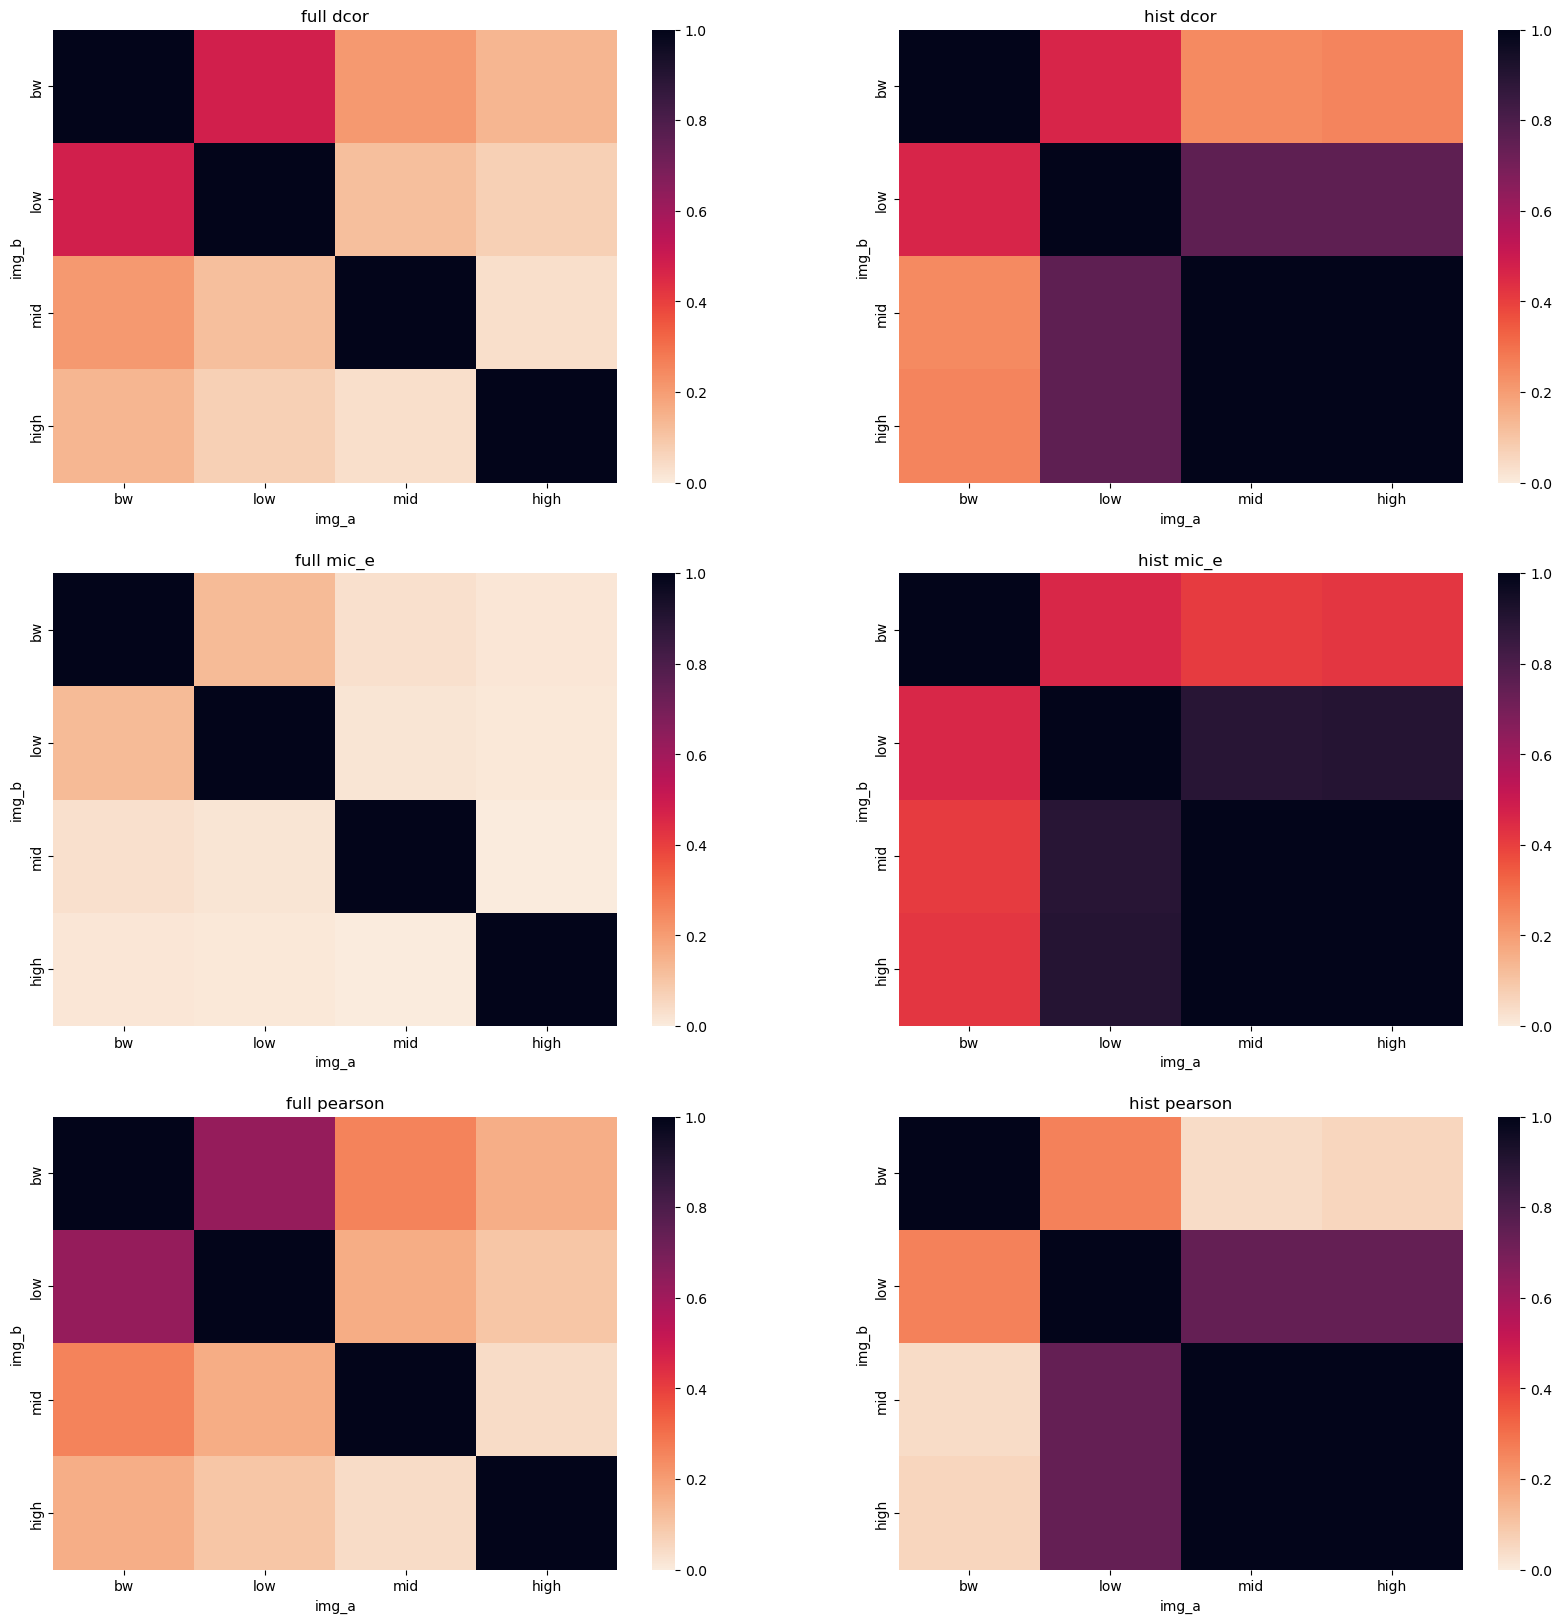

In [3]:
# plot heatmap for each method and each corr

i = 1
df_0 = df[df['img'] ==i]    
df_0.head()
img_path = f'./img/{i+1}.png'
plt.imshow(plt.imread(img_path), cmap='gray')
plt.show()

fig, axs = plt.subplots(3, 2, figsize=(20, 20))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

methods = ['full', 'hist']

corrs = ['dcor', 'mic_e', 'pearson']

# plot img 




for i in range(3):
    for j in range(2):
            df_corr = df_0[df_0['method'] == methods[j]]
            df_corr = df_corr[['img_a', 'img_b', corrs[i]]]
            df_corr['img_a'] = df_corr['img_a'].apply(lambda x: x.split('_')[-1])
            df_corr['img_b'] = df_corr['img_b'].apply(lambda x: x.split('_')[-1])
            # sort values in bw, low, mid, high order 
            df_corr['img_a'] = pd.Categorical(df_corr['img_a'], categories=['bw', 'low', 'mid', 'high'], ordered=True)
            df_corr['img_b'] = pd.Categorical(df_corr['img_b'], categories=['bw', 'low', 'mid', 'high'], ordered=True)
            df_corr = df_corr.sort_values(['img_a', 'img_b'])

            # heatmao img_a vs img_b
            #replace nan with 0
            df_corr = df_corr.pivot(index='img_a', columns='img_b', values=corrs[i])
            df_corr.fillna(0, inplace=True)
            # mirror values in matrix 
            df_corr = df_corr + df_corr.T - np.diag(df_corr.values.diagonal())
            # heatma between 0 and 1
            sns.heatmap(df_corr, cmap="rocket_r", ax=axs[i][j], vmin=0, vmax=1)
            axs[i][j].set_title(methods[j] + ' ' + corrs[i])
            axs[i][j].set_xlabel('img_a')
            axs[i][j].set_ylabel('img_b')

plt.savefig('heatmap_2.png')
plt.show()


            

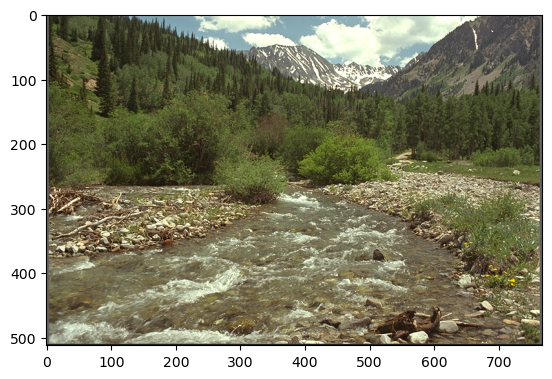

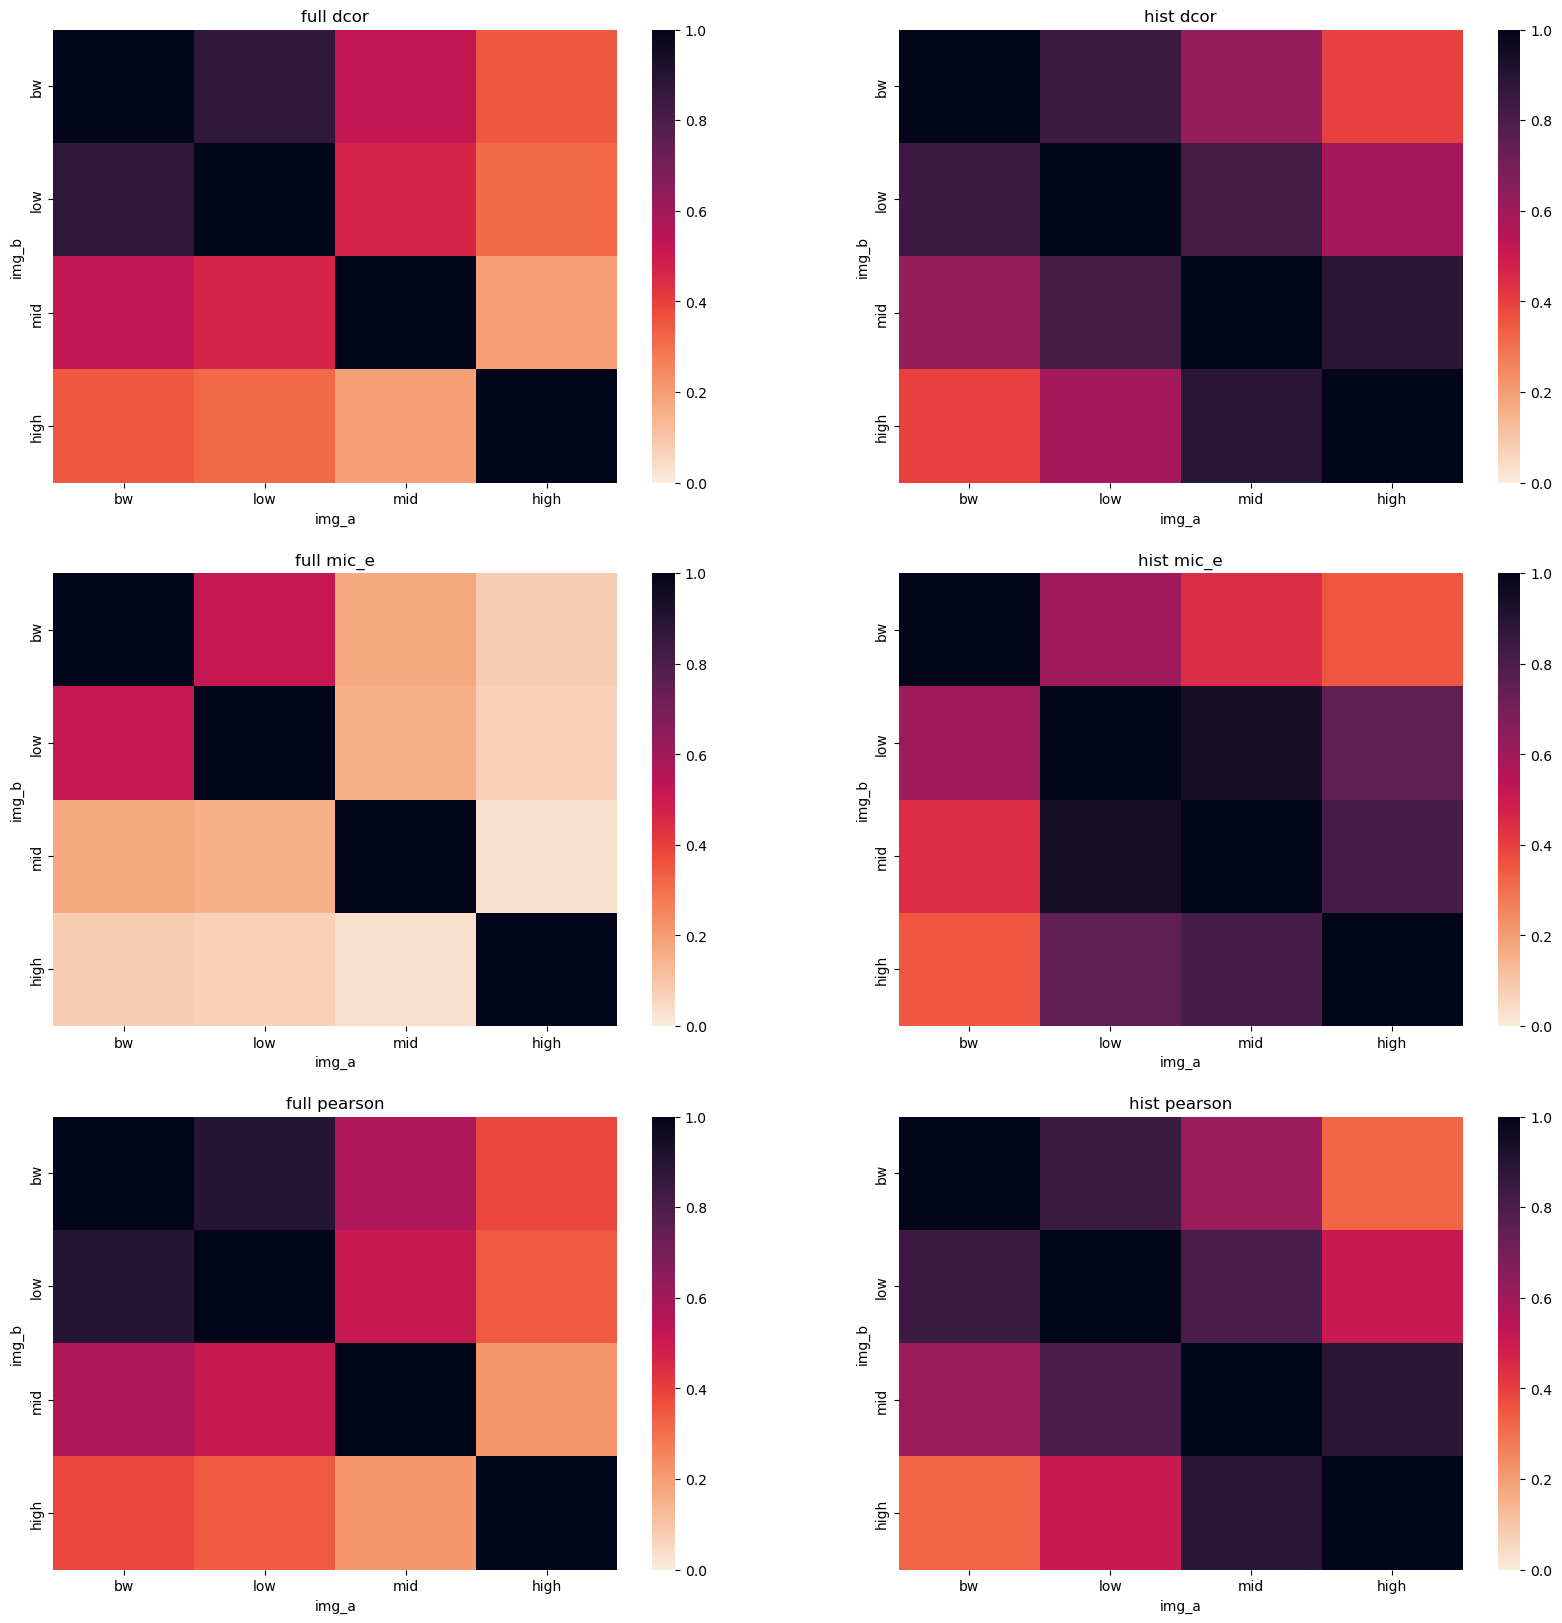

In [4]:
# plot heatmap for each method and each corr

i = 12
df_0 = df[df['img'] ==i]    
df_0.head()
img_path = f'./img/{i+1}.png'
plt.imshow(plt.imread(img_path), cmap='gray')
plt.show()

fig, axs = plt.subplots(3, 2, figsize=(20, 20))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

methods = ['full', 'hist']

corrs = ['dcor', 'mic_e', 'pearson']

# plot img 




for i in range(3):
    for j in range(2):
            df_corr = df_0[df_0['method'] == methods[j]]
            df_corr = df_corr[['img_a', 'img_b', corrs[i]]]
            df_corr['img_a'] = df_corr['img_a'].apply(lambda x: x.split('_')[-1])
            df_corr['img_b'] = df_corr['img_b'].apply(lambda x: x.split('_')[-1])
            # sort values in bw, low, mid, high order 
            df_corr['img_a'] = pd.Categorical(df_corr['img_a'], categories=['bw', 'low', 'mid', 'high'], ordered=True)
            df_corr['img_b'] = pd.Categorical(df_corr['img_b'], categories=['bw', 'low', 'mid', 'high'], ordered=True)
            df_corr = df_corr.sort_values(['img_a', 'img_b'])

            # heatmao img_a vs img_b
            #replace nan with 0
            df_corr = df_corr.pivot(index='img_a', columns='img_b', values=corrs[i])
            df_corr.fillna(0, inplace=True)
            # mirror values in matrix 
            df_corr = df_corr + df_corr.T - np.diag(df_corr.values.diagonal())
            # heatma between 0 and 1
            sns.heatmap(df_corr, cmap="rocket_r", ax=axs[i][j], vmin=0, vmax=1)
            axs[i][j].set_title(methods[j] + ' ' + corrs[i])
            axs[i][j].set_xlabel('img_a')
            axs[i][j].set_ylabel('img_b')

plt.savefig('heatmap_13.png')
plt.show()


            

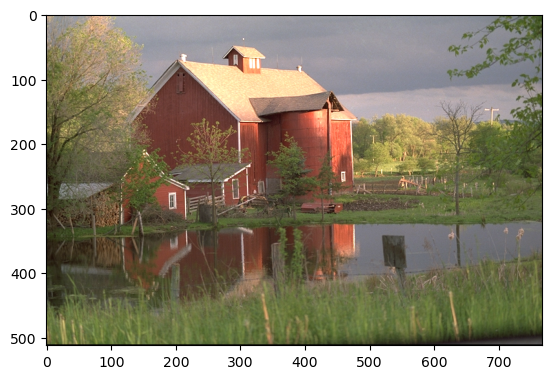

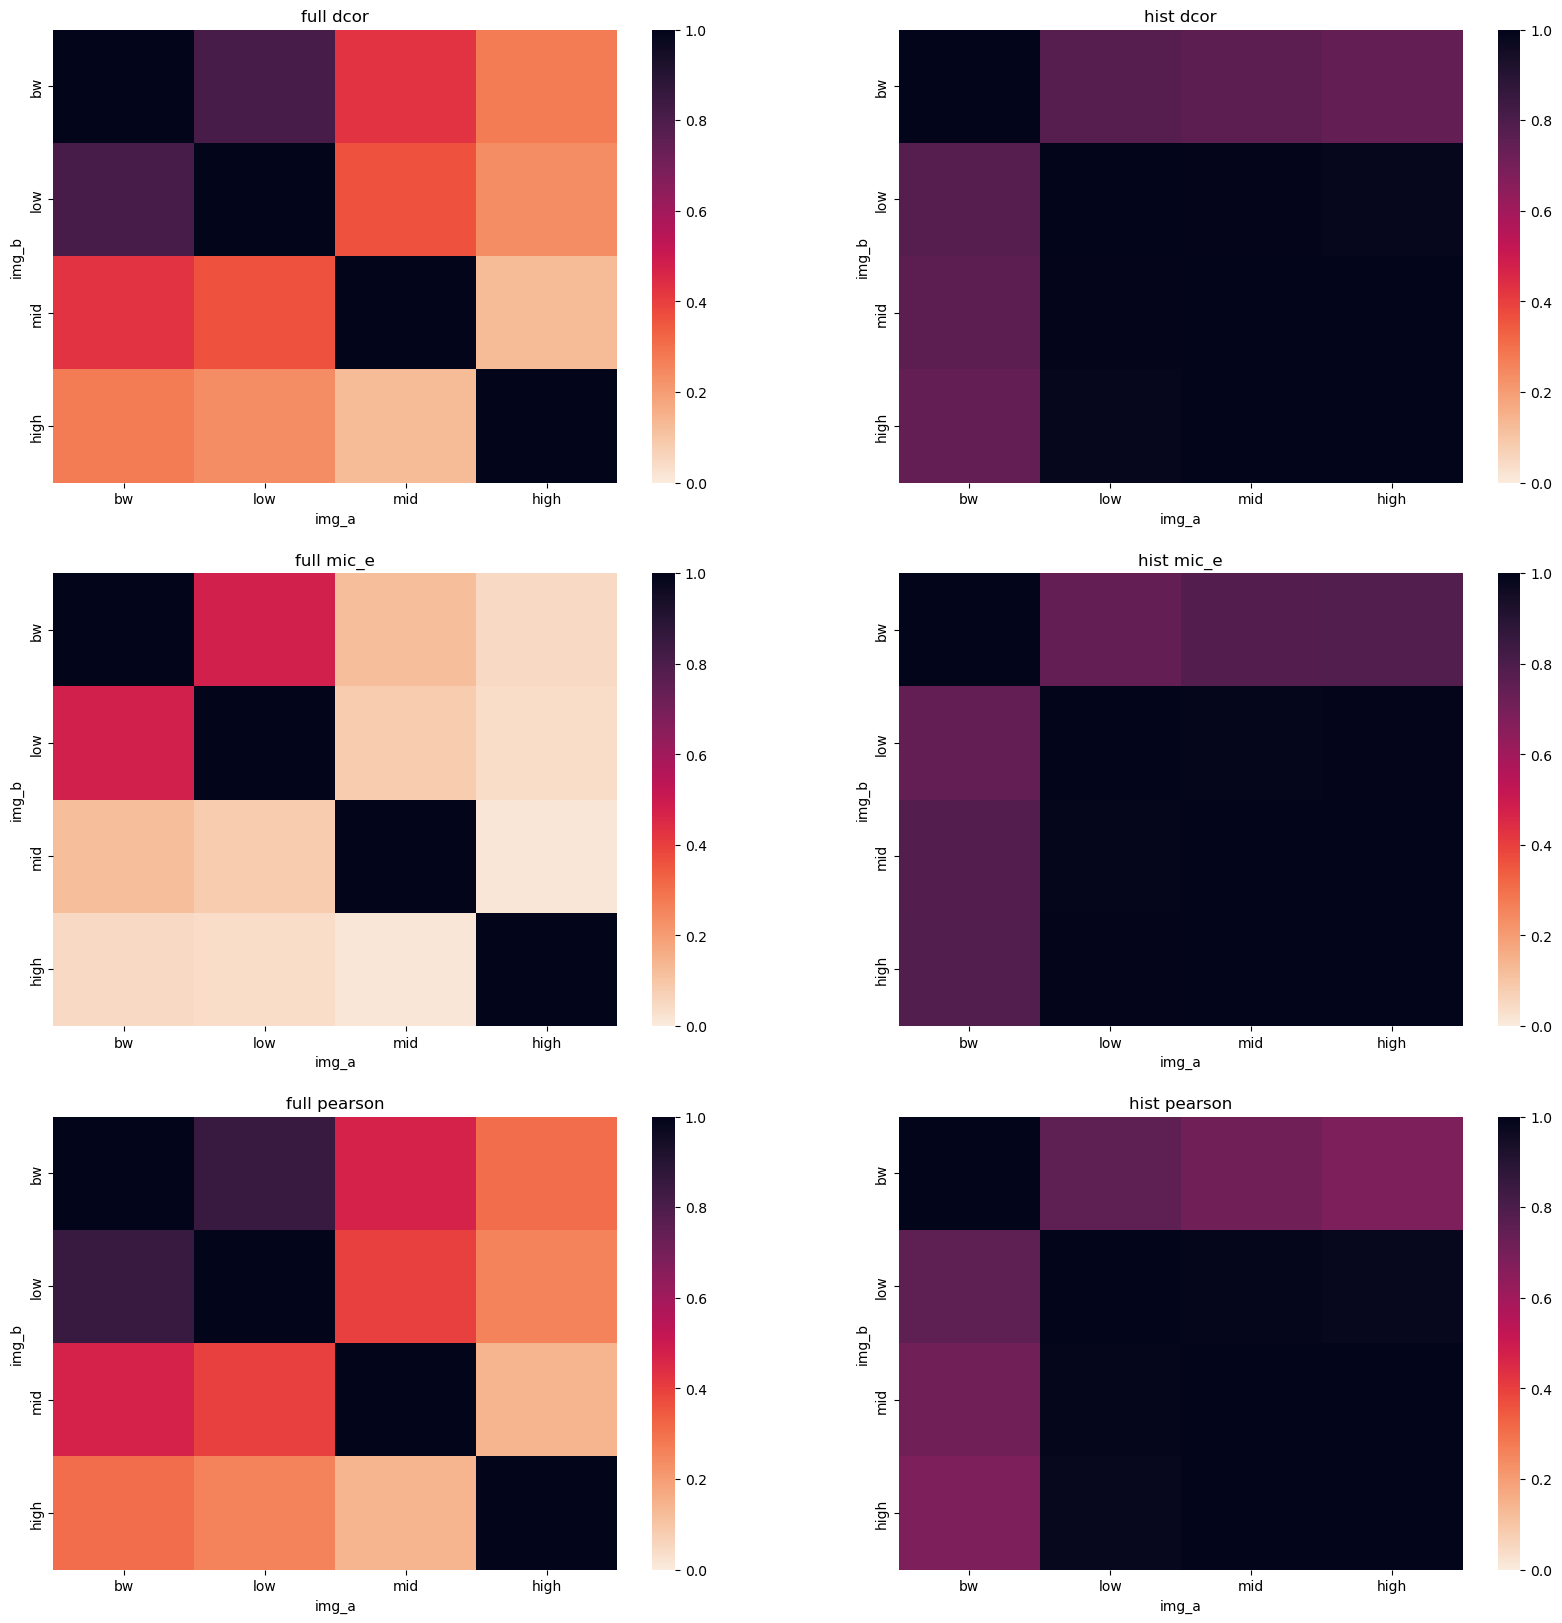

In [6]:
# plot heatmap for each method and each corr

i = 21
df_0 = df[df['img'] ==i]    
df_0.head()
img_path = f'./img/{i+1}.png'
plt.imshow(plt.imread(img_path), cmap='gray')
plt.show()

fig, axs = plt.subplots(3, 2, figsize=(20, 20))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

methods = ['full', 'hist']

corrs = ['dcor', 'mic_e', 'pearson']

# plot img 




for i in range(3):
    for j in range(2):
            df_corr = df_0[df_0['method'] == methods[j]]
            df_corr = df_corr[['img_a', 'img_b', corrs[i]]]
            df_corr['img_a'] = df_corr['img_a'].apply(lambda x: x.split('_')[-1])
            df_corr['img_b'] = df_corr['img_b'].apply(lambda x: x.split('_')[-1])
            # sort values in bw, low, mid, high order 
            df_corr['img_a'] = pd.Categorical(df_corr['img_a'], categories=['bw', 'low', 'mid', 'high'], ordered=True)
            df_corr['img_b'] = pd.Categorical(df_corr['img_b'], categories=['bw', 'low', 'mid', 'high'], ordered=True)
            df_corr = df_corr.sort_values(['img_a', 'img_b'])

            # heatmao img_a vs img_b
            #replace nan with 0
            df_corr = df_corr.pivot(index='img_a', columns='img_b', values=corrs[i])
            df_corr.fillna(0, inplace=True)
            # mirror values in matrix 
            df_corr = df_corr + df_corr.T - np.diag(df_corr.values.diagonal())
            # heatma between 0 and 1
            sns.heatmap(df_corr, cmap="rocket_r", ax=axs[i][j], vmin=0, vmax=1)
            axs[i][j].set_title(methods[j] + ' ' + corrs[i])
            axs[i][j].set_xlabel('img_a')
            axs[i][j].set_ylabel('img_b')

plt.savefig('heatmap22.png')
plt.show()


            